# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [1]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [2]:
from sklearn.linear_model import Perceptron

clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10, tol=.001 ) #warm_start=True
Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.00 seconds.
--

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (15%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [3]:
# !wget https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff

In [4]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.
def perceptron(dataset, max_iter=10, eta0=.1, shuffle=False, verbose=1, tol=.001):
    clf = Perceptron(shuffle=shuffle, verbose=max_iter, eta0=eta0, max_iter=max_iter, tol=tol) #warm_start=True
    Data_Set = arff.loadarff(dataset)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    clf.fit(X, y)
    print('Final Weights: ', clf.coef_)
    print('Bias Weights: ', clf.intercept_)
    print('Accuracy: ', clf.score(X, y))


perceptron('eval.arff')


-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.00

### 1.2 Discussion
For this problem, I made a function that is able to pass in the dataset and the various hyperparameters.

For my output I got that
- Accuracy = [0.9766763848396501]\
- Final Weights = [[-4.28857497 -2.390381   -3.0160324  -1.1686672 ]]\
- [5.2] - This last weight is the bias weight, which they call the intercept.

The epochs converged after the 9th cycle that means that the dataset is lineraly seperable for the most part with high accuarcy. I am not sure why it stopped after 9 epochs but then I discovered the ```tol``` input that has the following info:

    tolfloat or None, default=1e-3
    The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

This is makes little sense because the loss came from .018 to .015 and the tol is .001. I put in tol=None and it went to 10 epochs so I need to better understand what "avg loss" is and how it is different from loss.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.



### 2.2 (5%) Train on both sets using the scikit-learn perceptron model

In [5]:
# Create and show the 2 datasets. 
# You could do it here in Python or create arff files in your local folder with a text editor.
# Arff files are text files with a specific format. You can open them with a text editor to see the format.

print("Linearly Separable Dataset:")
perceptron('lin_sep.arff', max_iter=24, tol=None)
print("Not Linearly Separable Dataset:")
perceptron('non_lin_sep.arff', tol=None)


Linearly Separable Dataset:
-- Epoch 1
Norm: 0.72, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.500000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.700000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 2, Bias: -0.300000, T: 24, Avg. loss: 1.287500
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.17, NNZs: 2, Bias: -0.400000, T: 32, Avg. loss: 0.550000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 2, Bias: -0.600000, T: 40, Avg. loss: 1.062500
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 2, Bias: -0.800000, T: 48, Avg. loss: 0.562500
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 2, Bias: -0.800000, T: 56, Avg. loss: 0.500000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.00, NNZs: 2, Bias: -0.900000, T: 64, Avg. loss: 0.512500
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.22, NNZs: 2, Bias: -1.000000, T: 72, Avg. loss: 0.600000
Total trai

### 2.2 Discussion
For this part of the assingment I ran into similar signs with the tol parameter. I had a very simple linearly seperable funtion that was supposed to be able to seperate the stuff but when I ran it, it would give me accuracy at best of like .75. When I got rid of the tolerane, it was able to converge to 100%. I want to be able to understand what tol is better in relation to the losses. I think it makes sense that the second dataset did not result in 100% because it is not linearly seperable.

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

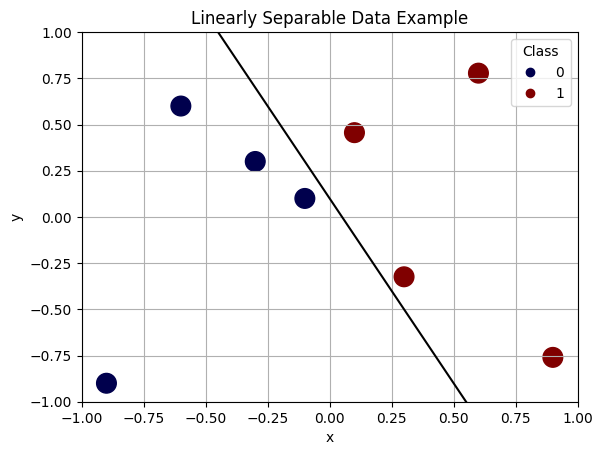

In [6]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

datasettt = (data, labels)

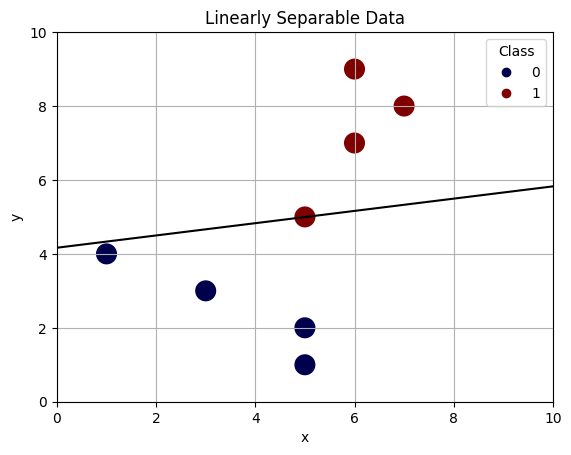

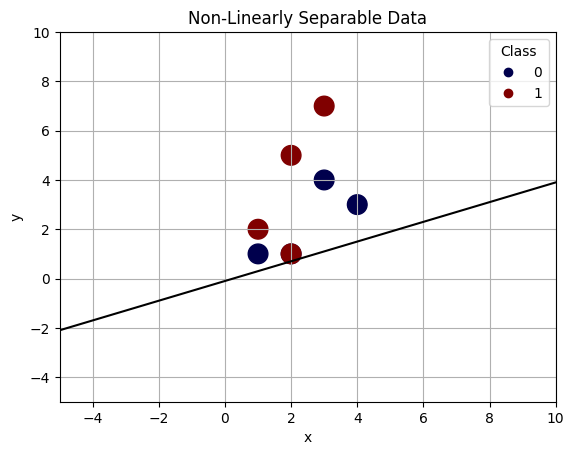

In [7]:
# Graph datasets and decision lines for both cases.
def convert_arff(filename):
    Data_Set = arff.loadarff(filename)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    return X, y
lin_sep_data, lin_sep_labels = convert_arff('lin_sep.arff')

# Linearly Separable Dataset:
# Final Weights:  [[-0.1  0.6]]
# Bias Weights:  [-2.5]
# Accuracy:  1.0

non_lin_sep_data, non_lin_sep_labels = convert_arff('non_lin_sep.arff')
# Not Linearly Separable Dataset:
# Final Weights:  [[-0.4  1. ]]
# Bias Weights:  [0.1]
# Accuracy:  0.5

plt.xlim(0,10)
plt.ylim(0,10)
scatter = plt.scatter(lin_sep_data[:,0], lin_sep_data[:,1], c = lin_sep_labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(0, 10, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(0, 10, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = .166
intercept = 4.1666
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

# Graph datasets and decision lines for both cases.

plt.xlim(-5,10)
plt.ylim(-5,10)
scatter = plt.scatter(non_lin_sep_data[:,0], non_lin_sep_data[:,1], c = non_lin_sep_labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-5, 10, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-5, 10, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = .4 # made up
intercept = -.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Non-Linearly Separable Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot


*Discussion*

### 2.4 (5%) Discuss why the perceptron won’t get perfect accuracy on non-linearly separable data

*Discussion*

The perceptron is able to adjust weights until it can get a hyperplane that perfectly splits the data by its hyperplane. If the data is not linearly separable, then it makes it impossible to be able to split the data by a line. Think trying to split a mixed up bag of blue and green marbles with a piece of paper (although that example is in 3D)

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [8]:
# !wget https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff

In [9]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

# Read the ARFF file
Data_Set = arff.loadarff('voting-dataset.arff')
# Show the modified dataset
votedf = pd.DataFrame(Data_Set[0])
# Define a mapping dictionary
mapping = {b'n': 0, b'y': 1}
# Loop through columns and apply the mapping
for column in votedf.columns:
    if votedf[column].dtype == 'object':  # Check if the column is of object type (bytes)
        votedf[column] = votedf[column].apply(lambda x: mapping.get(x, x))
# Map 'Class' column to 0 and 1 (if necessary)
class_mapping = {b'democrat': 0, b'republican': 1}
votedf['Class'] = votedf['Class'].map(class_mapping)

votedf

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0
1,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,1,0
4,1,1,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1
457,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0
458,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1
459,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1


In [10]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron


def run_perceptron_trials(dataset, num_trials, eta0=1):
    results = []  # Store results for each trial
    for trial in range(num_trials):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(
            dataset.iloc[:, :-1], dataset['Class'], test_size=0.3, random_state=trial
        )
        # Create and train the perceptron
        clf = Perceptron(eta0=eta0, max_iter=100, tol=.001, shuffle=False, random_state=trial)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial + 1, train_accuracy, test_accuracy, num_epochs])

    # Calculate average results
    avg_results = np.mean(np.array(results)[:, 1:], axis=0)
    avg_trial = ['Average'] + avg_results.tolist()

    # Create a DataFrame to display results
    result_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs'])
    result_df = result_df.append(pd.Series(avg_trial, index=result_df.columns), ignore_index=True)

    return result_df

# Run the perceptron for 5 trials
results_df = run_perceptron_trials(votedf, 5, eta0=1)
results_df







,Trial,Training Accuracy,Test Accuracy,Number of Epochs
0,1,0.972050,0.956835,17.0
1,2,0.913043,0.906475,11.0
2,3,0.965839,0.949640,20.0
3,4,0.968944,0.964029,12.0
4,5,0.962733,0.964029,14.0
5,Average,0.956522,0.948201,14.8


### 3.2 (5%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [11]:
#Learn once on the full voting data set

def df_perceptron(dataset, max_iter=100, eta0=.1, shuffle=False, verbose=1, tol=.001, warm_start=False, random_state = 0):
    clf = Perceptron(shuffle=shuffle, verbose=max_iter, eta0=eta0, max_iter=max_iter, tol=tol, warm_start=warm_start, random_state=random_state) #warm_start=True
    Data_Set_np = dataset.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    clf.fit(X, y)
    print('Final Weights: ', clf.coef_)
    print('Bias Weights: ', clf.intercept_)
    print('Accuracy: ', clf.score(X, y))
df_perceptron(votedf, eta0=1)


-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 1383, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 1844, Avg. loss: 0.206074
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 23.26, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.184382
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 24.78, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.199566
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 25.44, NNZs: 15, Bias: -9.000000, T: 3227, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 25.96, NNZs: 14, Bias: -9.000000, T: 3688, Avg. loss: 0.199566
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds
Final Weights:  [[ 2. -3. -7. 19.  3.

I ran this model with a similar framework to the first 2 parts of this assignment and it scored well. The main idea is can learning supporting certain bills classify whether or not a certain voter is a democrat or a republican. With 97% accuracy, it did pretty well (perhaps it overfit and it isn't that high on another dataset?). Looking at the data, there are a couple of features with extra high weights that make me think they play heavier into the correlation between being a democrat or republican. 
- Attribute 4: 'physician fee freeze'. This makes me think that the way that you vote on that attribute is highly correlated with the way you lean.
- Attribute 9: mx-missile
- Attribute 11: synfuels-corporation-cutback

While I am not super involved in politics, I know healthcare, military, and energy spending are all pretty partisian topics so it makes sense the perceptron model would put heavier weights on them.

### 3.3 (10%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial rate should be about 50% and let that be your first point on your graph.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [12]:
#Based on the above output, it took 8 epochs until it converged.
n_iter = 8
misclassified = [.5]
# votedf, max_iter=1, eta0=.5, shuffle=False, verbose=0, warm_start=True, random_state=1
clf = Perceptron(max_iter=1, eta0=1, shuffle=False, verbose=True, warm_start=True) #warm_start=True
Data_Set_np = votedf.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
for i in range(n_iter):
    print('Epoch: ', i+1)
    clf.fit(X, y)
    print('Final Weights: ', clf.coef_)
    print('Bias Weights: ', clf.intercept_)
    print('Accuracy: ', clf.score(X, y))
    print()
    misclassified.append(1-clf.score(X, y))


Epoch:  1
-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
Final Weights:  [[-1. -1. -5. 10.  1. -2.  1.  1. -2.  1. -6.  3.  0.  1. -1.  2.]]
Bias Weights:  [-2.]
Accuracy:  0.9479392624728851

Epoch:  2
-- Epoch 1
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.188720
Total training time: 0.00 seconds.
Final Weights:  [[ 0. -1. -6. 13.  1. -3.  2.  1. -3.  2. -7.  0. -1.  0. -2.  3.]]
Bias Weights:  [-4.]
Accuracy:  0.9609544468546638

Epoch:  3
-- Epoch 1
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 461, Avg. loss: 0.162690
Total training time: 0.00 seconds.
Final Weights:  [[ 1. -1. -7. 14.  1. -1.  0.  1. -4.  2. -8.  2.  0.  0. -1.  4.]]
Bias Weights:  [-4.]
Accuracy:  0.9522776572668112

Epoch:  4
-- Epoch 1
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 461, Avg. loss: 0.206074
Total training time: 0.00 seconds.
Final Weights:  [[ 1. -1. -5. 15.  2. -2.  2.  3. -6.  1. -9.  3. -1.  1. -3.  6.]]
Bias Weights

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_mo

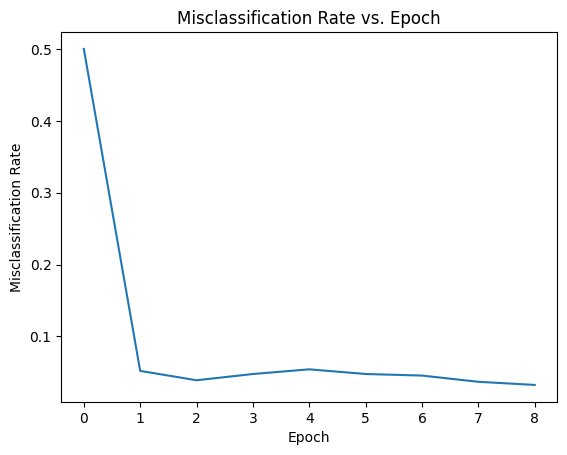

In [13]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
    
def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()
plot_misclassification(misclassified)

*Show table and discuss*

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- learning_rate
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [14]:
#Shuffle
results = []
for trial in range(10):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        # Create and train the perceptron
        shuffle = False
        if trial % 2 == 0:
                shuffle = True
        clf = Perceptron(shuffle=shuffle)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, shuffle])

# Calculate average results
avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
shuffle_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Shuffle'])
shuffle_df = shuffle_df.append(pd.Series(avg_trial, index=shuffle_df.columns), ignore_index=True)
shuffle_df



,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Shuffle
0,0,0.959627,0.949640,7.0,True
1,1,0.913043,0.906475,11.0,False
2,2,0.962733,0.928058,9.0,True
3,3,0.968944,0.964029,12.0,False
4,4,0.913043,0.920863,10.0,True
5,5,0.965839,0.985612,12.0,False
6,6,0.925466,0.964029,19.0,True
7,7,0.968944,0.942446,8.0,False
8,8,0.947205,0.949640,7.0,True
9,9,0.962733,0.956835,11.0,False


In [15]:
#learning_rate
results = []
for trial in range(10):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        # Create and train the perceptron
        learning_rate = .1
        if trial > 0:
                learning_rate = .4*trial       
        clf = Perceptron(eta0=learning_rate)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, learning_rate])

# Calculate average results
avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
learning_rate_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Learning Rate'])
learning_rate_df =learning_rate_df.append(pd.Series(avg_trial, index=learning_rate_df.columns), ignore_index=True)
learning_rate_df


,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Learning Rate
0,0,0.965839,0.935252,7.0,0.10
1,1,0.962733,0.942446,7.0,0.40
2,2,0.959627,0.942446,20.0,0.80
3,3,0.934783,0.956835,20.0,1.20
4,4,0.962733,0.956835,12.0,1.60
5,5,0.959627,0.956835,12.0,2.00
6,6,0.937888,0.942446,14.0,2.40
7,7,0.956522,0.928058,9.0,2.80
8,8,0.962733,0.964029,8.0,3.20
9,9,0.965839,0.949640,13.0,3.60


In [16]:
#Verbose hyperparameter
results = []
for trial in range(4):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        if trial % 2 == 0:
                verbose = False
        else:
                verbose = True
        clf = Perceptron(verbose=verbose)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, verbose])

# Calculate average results
avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
# learning_rate_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Learning Rate'])
# learning_rate_df =learning_rate_df.append(pd.Series(avg_trial, index=learning_rate_df.columns), ignore_index=True)
# learning_rate_df
verbose_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Verbose'])
verbose_df =verbose_df.append(pd.Series(avg_trial, index=verbose_df.columns), ignore_index=True)
verbose_df

-- Epoch 1
Norm: 13.71, NNZs: 15, Bias: -3.000000, T: 322, Avg. loss: 0.354037
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.25, NNZs: 15, Bias: -3.000000, T: 644, Avg. loss: 0.226708
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 20.45, NNZs: 15, Bias: -5.000000, T: 966, Avg. loss: 0.245342
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.20, NNZs: 14, Bias: -5.000000, T: 1288, Avg. loss: 0.236025
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 20.12, NNZs: 13, Bias: -6.000000, T: 1610, Avg. loss: 0.279503
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 21.89, NNZs: 16, Bias: -8.000000, T: 1932, Avg. loss: 0.217391
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 22.02, NNZs: 15, Bias: -8.000000, T: 2254, Avg. loss: 0.288820
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 23.19, NNZs: 16, Bias: -9.000000, T: 2576, Avg. loss: 0.270186
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 23.77, NNZs: 15, Bias: -8.000000, T: 2898, Avg. loss: 0.282609
Tot

,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Verbose
0,0,0.959627,0.949640,7.0,False
1,1,0.968944,0.964029,15.0,True
2,2,0.962733,0.928058,9.0,False
3,3,0.962733,0.964029,9.0,True
4,Average,0.963509,0.951439,10.0,0.5


In [17]:
# Fit Intercept hyperparameter
#Verbose hyperparameter
results = []
for trial in range(14):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        if trial % 2 == 0:
                fit_intercept = False
        else:
                fit_intercept = True
        clf = Perceptron(fit_intercept=fit_intercept)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, fit_intercept])

# Calculate average results
avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
fit_intercpet_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Fit Intercept'])
fit_intercpet_df = fit_intercpet_df.append(pd.Series(avg_trial, index=fit_intercpet_df.columns), ignore_index=True)
fit_intercpet_df

,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Fit Intercept
0,0,0.965839,0.956835,7.000000,False
1,1,0.968944,0.964029,15.000000,True
2,2,0.962733,0.935252,12.000000,False
3,3,0.962733,0.964029,9.000000,True
4,4,0.919255,0.920863,10.000000,False
5,5,0.959627,0.956835,12.000000,True
6,6,0.944099,0.942446,8.000000,False
7,7,0.972050,0.942446,9.000000,True
8,8,0.975155,0.956835,9.000000,False
9,9,0.975155,0.906475,8.000000,True


In [18]:
#Random State hyperparameter
results = []
for trial in range(4):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        clf = Perceptron(random_state=trial)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, trial])

avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
random_state_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Random State'])
random_state_df = random_state_df.append(pd.Series(avg_trial, index=random_state_df.columns), ignore_index=True)
random_state_df
        

,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Random State
0,0,0.959627,0.949640,7.00,0.0
1,1,0.965839,0.964029,7.00,1.0
2,2,0.975155,0.906475,9.00,2.0
3,3,0.959627,0.971223,12.00,3.0
4,Average,0.965062,0.947842,8.75,1.5


In [19]:
#Warm Start hyperparameter
results = []
for trial in range(4):
        # Split the dataset into training and test sets (70/30)
        X_train, X_test, y_train, y_test = train_test_split(votedf.iloc[:, :-1], votedf['Class'], test_size=0.3, random_state=trial)
        if trial % 2 == 0:
                warm_start = False
        else:
                warm_start = True
        clf = Perceptron(warm_start=warm_start)
        clf.fit(X_train, y_train)
        # Calculate training and test accuracy
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        # Record the number of epochs to converge
        num_epochs = clf.n_iter_
        # Store results for this trial
        results.append([trial, train_accuracy, test_accuracy, num_epochs, warm_start])
avg_results = np.mean(np.array(results)[:, 1:], axis=0)
avg_trial = ['Average'] + avg_results.tolist()

# Create a DataFrame to display results
warm_start_df = pd.DataFrame(results, columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs', 'Warm Start'])
warm_start_df = warm_start_df.append(pd.Series(avg_trial, index=warm_start_df.columns), ignore_index=True)
warm_start_df

,Trial,Training Accuracy,Test Accuracy,Number of Epochs,Warm Start
0,0,0.959627,0.949640,7.0,False
1,1,0.968944,0.964029,15.0,True
2,2,0.962733,0.928058,9.0,False
3,3,0.962733,0.964029,9.0,True
4,Average,0.963509,0.951439,10.0,0.5


## Discussion
This was an interesting experiement. I am going to break it down by topic:

- Shuffle: For this trial I held all constant in perceptron but the shuffle. Shuffle makes it so the data is shuffled after each eposh as to not get stuck on a local minimum and end the iteration prematurely. The data is, however, perpelexing. I was expecting for there to be more epochs in training but in almost all of the cases where the perceptron is running, the shuffled data happened to have less epochs. Peculiar.

- eta0 - learning rate is the rate at which you change the weights on the model. From the experiment I ran and the table produced, there was no clear single table that was better, aka the learning rate did not vastly increase or decrease the accuracy of the model.

- verbose: This is cool. basically just shows you more information. Does not effect performance.

- fit_intercept - whether to use a bias weight or not. If the data is already fit to the intercept then it doesn't factor in a bias. Unsuprisingly, the bias added helped the models performance on the train and test sets. 

- random state- This variable gives a random seed. Given that it is random. there is no real benefit for one random seed to the next.

- warm start - Warm start makes a model pick up where it left off on a previous run, this would allow for a greater accuracy given it starts with given more tuned weights. It did not effect much in my trials.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [20]:
# Load and Train on your dataset and report results
import pandas as pd
header = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", 'heart disease']

hd = pd.read_csv('heart_disease.csv', names=header)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Normalize Data
data_to_normalize = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

hd.replace('?', np.nan, inplace=True)

scaler = MinMaxScaler()
hd[data_to_normalize] = scaler.fit_transform(hd[data_to_normalize])

# Fill the NaN values with the mean of the column
mean_values = hd.mean()
hd.fillna(mean_values, inplace=True)
hd.fillna(0, inplace=True)

hd['heart disease'] = hd['heart disease'].apply(lambda x: 1 if x > 0 else 0)





/var/folders/rv/_0h726fn3sx8dldgsbxjxv_h0000gn/T/ipykernel_91280/1252451318.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = hd.mean()


In [22]:
# Run the perceptron
df_perceptron(hd, eta0=2,shuffle=True, max_iter= 100, random_state=2)

-- Epoch 1
Norm: 54.05, NNZs: 13, Bias: -28.000000, T: 303, Avg. loss: 15.536024
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 76.42, NNZs: 13, Bias: -38.000000, T: 606, Avg. loss: 12.679647
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 87.72, NNZs: 13, Bias: -52.000000, T: 909, Avg. loss: 10.451199
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 98.22, NNZs: 12, Bias: -60.000000, T: 1212, Avg. loss: 10.258901
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 106.86, NNZs: 13, Bias: -60.000000, T: 1515, Avg. loss: 10.735500
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 111.54, NNZs: 12, Bias: -64.000000, T: 1818, Avg. loss: 10.159460
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 119.73, NNZs: 13, Bias: -70.000000, T: 2121, Avg. loss: 11.655090
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 123.76, NNZs: 12, Bias: -72.000000, T: 2424, Avg. loss: 10.198082
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 128.99, NNZs: 12, Bias: -76.000000, T: 2727, A

*Discuss how the perceptron did on the data set and why you think it performed as such.*
I ran the perceptron on the [heart disease data](https://archive.ics.uci.edu/dataset/45/heart+disease) and was able to get the model up to an accuracy of nearly 82%. I think this makes sense becuase when it comes to heart disease I have heard there are certain things that have a real impact on health. the particular attributes that stood out when the weights came back were:

- 8 - thalach which is the max heart rate achieved (negative correlation)
- 10 - oldpeak = = ST depression induced by exercise relative to rest (+ correlation)
- 12 - CA = number of major vessels covered by flourosopy (+ correlation)

These attributes all make sense because if you have a low max heart rate (not increasing your exercise threshold), you likely could have a heart disease, and ST depression puts you at higher heart risk sname with high CA which means there is more heart blockage. 

It makes sense these have high correlations.

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

*Discussion*

In [23]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.
import sklearn.utils
from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True, max_iter = 10, verbose=False, tol=.0001):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.max_iter = max_iter
        self.verbose = verbose
        self.loss_hist = []
        self.tol = tol

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights(X) if not initial_weights else initial_weights

        for epoch in range(self.max_iter):
            if self.shuffle:
                X, y = sklearn.utils.shuffle(X, y)

            # Loss
            total_loss = 0.0

            for i in range(len(X)):
                output = self.predict(X[i])
                loss = max(0, 1 - y[i] * output)
                total_loss += loss

                if output != y[i]:
                    self.weights[1:] += self.lr * (y[i] - output) * X[i]
                    self.weights[0] += self.lr * (y[i] - output)

            average_loss = total_loss / len(X)
            self.loss_hist.append(average_loss)

            if self.verbose:
                print('--Epoch: ', epoch+1)
                print('Weights: ', self.weights[1:], ' Bias: ', self.weights[0], ' Average Loss: ', average_loss) 
            
            #calculate tol  (loss > previous_loss - tol).
            if epoch > 0 and self.tol and total_loss > self.loss_hist[epoch] - self.tol:
                break            
                
            

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        net = np.dot(X, self.weights[1:]) + self.weights[0]
        if net > 0:
            return 1
        else:
            return 0

    def initialize_weights(self, X):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        # ADD ONE TO INCLUDE BIAS
        return np.zeros(1 + X.shape[1])

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        correct = 0
        for i in range(len(X)):
            if self.predict(X[i]) == y[i]:
                correct += 1
        return correct / len(X)

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        return self.weights

In [24]:
# Your Perceptron Code
classifier = PerceptronClassifier(lr=.1, shuffle=True, verbose=True, max_iter=10, tol=None)


myDS = arff.loadarff("eval.arff")
myDF = pd.DataFrame(myDS[0])
myNP = myDF.to_numpy()
myNp = myNP.astype(float)
myX = myNp[:, :-1]
myy = myNp[:, -1]

classifier.fit(myX, myy)
print('Model Accuracy: ', classifier.score(myX, myy))

--Epoch:  1
Weights:  [-4.1858351 -2.3850643 -2.244253  -0.8386056]  Bias:  2.400000000000001  Average Loss:  0.5940233236151603
--Epoch:  2
Weights:  [-4.6313101 -2.7049393 -3.244913  -0.2582465]  Bias:  3.1000000000000014  Average Loss:  0.5714285714285714
--Epoch:  3
Weights:  [-4.6960181 -3.1392513 -3.898483  -0.7307136]  Bias:  4.100000000000001  Average Loss:  0.5728862973760933
--Epoch:  4
Weights:  [-5.7076091 -3.1818513 -3.501253  -1.1900597]  Bias:  4.899999999999999  Average Loss:  0.5714285714285714
--Epoch:  5
Weights:  [-5.5069201 -3.5497413 -4.351183  -0.5136067]  Bias:  5.299999999999997  Average Loss:  0.5685131195335277
--Epoch:  6
Weights:  [-6.1640131 -4.4210923 -3.016133  -1.3467974]  Bias:  6.099999999999994  Average Loss:  0.5692419825072886
--Epoch:  7
Weights:  [-6.3291191 -3.6318543 -3.939073  -0.8744014]  Bias:  6.499999999999993  Average Loss:  0.5670553935860059
--Epoch:  8
Weights:  [-7.1607061 -3.0497453 -4.427073  -0.7719511]  Bias:  6.299999999999994  A

In [25]:
clf2 = PerceptronClassifier(lr=.1, shuffle=True, verbose=True, max_iter=10, tol=None)


# Read the ARFF file
Data_Set = arff.loadarff('voting-dataset.arff')
# Show the modified dataset
votedf = pd.DataFrame(Data_Set[0])
# Define a mapping dictionary
mapping = {b'n': 0, b'y': 1}
# Loop through columns and apply the mapping
for column in votedf.columns:
    if votedf[column].dtype == 'object':  # Check if the column is of object type (bytes)
        votedf[column] = votedf[column].apply(lambda x: mapping.get(x, x))
# Map 'Class' column to 0 and 1 (if necessary)
class_mapping = {b'democrat': 0, b'republican': 1}
votedf['Class'] = votedf['Class'].map(class_mapping)

votedf


datasnp = votedf.to_numpy()
datasnp = datasnp.astype(float)
datasX = datasnp[:, :-1]
datasy = datasnp[:, -1]

clf2.fit(datasX, datasy)
print('Model Accuracy: ', clf2.score(datasX, datasy))

--Epoch:  1
Weights:  [ 1.00000000e-01 -2.00000000e-01 -6.00000000e-01  1.00000000e+00
  1.00000000e-01 -2.00000000e-01  3.00000000e-01  2.77555756e-17
 -2.00000000e-01  1.00000000e-01 -4.00000000e-01  2.00000000e-01
  1.00000000e-01  2.00000000e-01 -3.00000000e-01 -2.00000000e-01]  Bias:  -0.4  Average Loss:  0.6594360086767896
--Epoch:  2
Weights:  [ 1.00000000e-01  1.00000000e-01 -4.00000000e-01  1.10000000e+00
  1.00000000e-01 -1.00000000e-01  4.00000000e-01  3.00000000e-01
 -4.00000000e-01  2.00000000e-01 -5.00000000e-01  1.00000000e-01
  2.00000000e-01  3.00000000e-01 -3.00000000e-01 -2.77555756e-17]  Bias:  -0.4  Average Loss:  0.6377440347071583
--Epoch:  3
Weights:  [-1.00000000e-01 -2.77555756e-17 -5.00000000e-01  1.00000000e+00
  1.00000000e-01 -1.00000000e-01  4.00000000e-01  1.00000000e-01
 -6.00000000e-01  2.00000000e-01 -6.00000000e-01  2.77555756e-17
  2.00000000e-01 -1.00000000e-01 -3.00000000e-01 -2.77555756e-17]  Bias:  -0.6  Average Loss:  0.6247288503253796
--Epoch

## Extra Credit Discussion
On this part I implemented the perceptron model and was able to perform well with the datasets privided. The original voting dataset performed higher by an average of about 3%. My model was still very successful and did well around 94% Accuracy. Whith the eval dataset I got comperable accuracy of 97%. 

The most interesting part of this is learning how to implement the model for myself. It was good to get a feel for the ins and the outs of the model and see how to do better.